
Mounting the contents required from google drive


In [ ]:
%cd "/content/drive/My Drive/NNFL-Assignments/1"
!ls

/content/drive/My Drive/NNFL-Assignments/1
assignment-1.pdf  functions_v.py   Q1.py  Q7.py
data2.csv	  main.py	   Q3.py  test_feature_matrix.csv
data3.csv	  NNFL-Q4.jpeg	   Q4.py  test_output.csv
data4.csv	  NNFL_v1_3.ipynb  Q5.py  training_feature_matrix.csv
functions.py	  __pycache__	   Q6.py  training_output.csv


Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import time

Defining some functions to read files , get column data , split numpy arrays as required and finally normalizing our arrays


In [ ]:
def read(name):
    return pd.read_csv(name + '.csv', header=None)


def getcol(data, c):
    col = []
    var = data.shape[0]
    for i in range(0, data.shape[0]):
        col.append(data[i][c])
    return col


def split(data, op):
    # specific to question 1. add cases accordingly
    x1 = data[0:, 0]
    x2 = data[0:, 1]
    y = op[0:, 0]
    return x1, x2, y


def split1(data):
    x1 = data[0:, 0]
    x2 = data[0:, 1]
    y = data[:, 2]
    return x1, x2, y

def Normalize(data):
    mean = np.ones(data.shape[1])
    sdev = np.ones(data.shape[1])
    for i in range(0, data.shape[1]):
        mean[i] = np.mean(data.transpose()[i])
        sdev[i] = np.std(data.transpose()[i])
        for j in range(0, data.shape[0]):
            data[j][i] = (data[j][i] - mean[i]) / sdev[i]
    return data


Main code starts , this code will retrieve the various test and training datasets and normalize them for future use

In [ ]:
X_train = read('training_feature_matrix')
Y_train = read('training_output')
X_test = read('test_feature_matrix')
Y_test = read('test_output')
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

X_train = Normalize(X_train)
Y_train = Normalize(Y_train)
X_test = Normalize(X_test)
Y_test = Normalize(Y_test)
x1, x2, y = split(X_train, Y_train)
X1, X2, Y = split(X_test, Y_test)

Some additional functions related with hypothesis and mean square error calculations


In [ ]:
def hypothesis(w0, w1, w2, x1, x2):
    hyp = np.ones(x1.shape[0])
    for i in range(0, x1.shape[0]):
        hyp[i] = w0 + w1 * x1[i] + w2 * x2[i]

    return hyp


def summa(hyp, rows, y_data, x_data):
    sum = 0
    for i in range(0, rows):
        sum = sum + (hyp[i] - y_data[i]) * x_data[i]
    return sum


def mse(h, y, rows):
    sum = 0
    for i in range(0, rows):
        sum = sum + (h[i] - y[i]) ** 2
    return sum

2 functions to plot 2D and 3D graphs , taking in multiple arguments and plotting them with specified labels


In [ ]:
def plot2d(label1, label2, y, title):
    fig = plt.figure()
    plt.style.use('dark_background')
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.plot(y)
    plt.title(title + " : "+label1 + "  vs  " + label2)
    plt.xlabel(label2)
    plt.ylabel(label1)
    plt.show()


def plot3d(x, y, z, label1, label2, label3, title):
    fig = plt.figure()
    plt.style.use('dark_background')
    plt.title(title + " : " + label1 + "  vs  " + label2 + " vs "+ label3)
    plt.rcParams["figure.figsize"] = (10, 10)
    ax = plt.axes(projection='3d')
    ax.plot3D(x, y, z, 'red')
    ax.set_xlabel(label1, fontsize=18)
    ax.set_ylabel(label2, fontsize=18)
    ax.set_zlabel(label3, fontsize=18)

A function to calculate the accuracy of our model , it takes in test data and analyzes accordingly

In [ ]:
def pred(w0, w1, w2, X1, X2, Y):
    pred = hypothesis(w0, w1, w2, X1, X2)
    #mean = np.mean(pred.transpose())
    #sdev = np.std(pred.transpose())
    # print(mean)
    # print(sdev)
    #pred = pred * sdev + mean
    err = 0
    for i in range(0, pred.shape[0]):
        err = err + (pred[i] - Y[i]) ** 2
    err = err / pred.shape[0]
    print("MSE :", err)
    return err

A batch gradient descent function to do the batch gradient

In [ ]:
def batch_gradient_descent(x1, x2, y):
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
    iters = 300
    alpha = 0.0001
    h = hypothesis(w0, w1, w2, x1, x2)
    cost = [0 for i in range(iters)]
    w0_list = [1 for i in range(iters)]
    w1_list = [1 for i in range(iters)]
    w2_list = [1 for i in range(iters)]
    for i in range(0, iters):
        w0 = w0 - alpha * summa(h, y.shape[0], y, x0)
        w1 = w1 - alpha * summa(h, y.shape[0], y, x1)
        w2 = w2 - alpha * summa(h, y.shape[0], y, x2)
        w0_list[i] = w0
        w1_list[i] = w1
        w2_list[i] = w2
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[i] = 1 * 0.5 * mse(h, y, y.shape[0])
    return w0, w1, w2, cost, w1_list, w2_list

<h3> Q1 </h3> <br>

BATCH GRADIENT DESCENT
 
W0 : 0.00010073333447893473
W1 : 0.04371084620195409
W2 : 0.25837730369557094
 


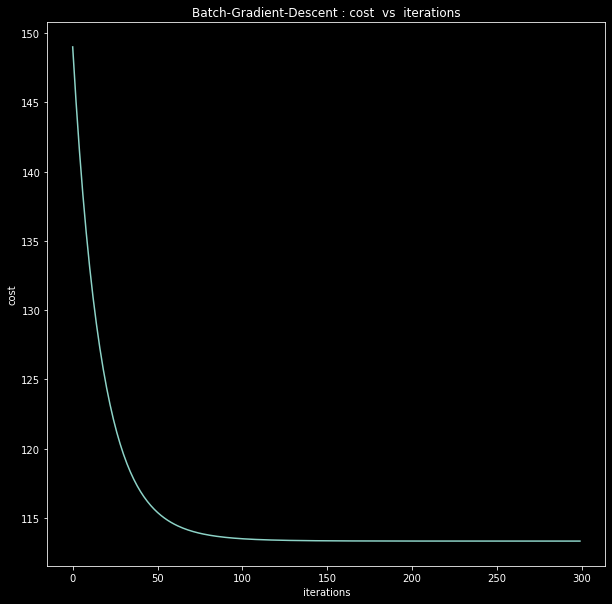

 
 
MSE : 0.9811196960335471


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


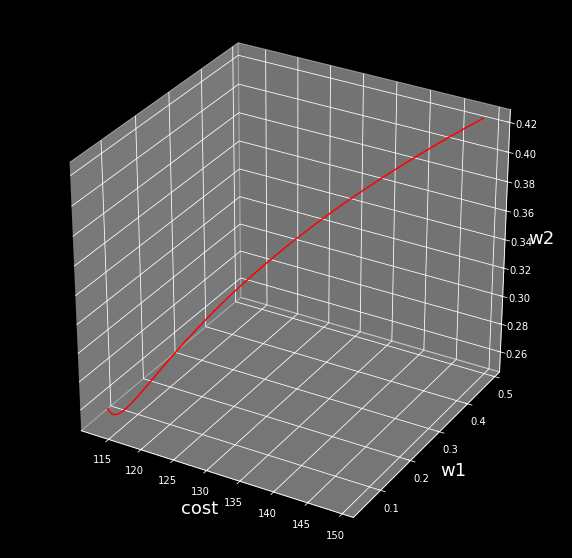

In [ ]:
print("BATCH GRADIENT DESCENT")
print(" ")
w0_bgd, w1_bgd, w2_bgd, cost_bgd, w1_list_bgd, w2_list_bgd = batch_gradient_descent(x1, x2, y)
print("W0 :", w0_bgd)
print("W1 :", w1_bgd)
print("W2 :", w2_bgd)
print(" ")
plot2d("cost", "iterations", cost_bgd, "Batch-Gradient-Descent")
print(" ")
plot3d(cost_bgd, w1_list_bgd, w2_list_bgd, "cost", "w1", "w2", "Batch-Gradient-Descent")
print(" ")
mse_bgd = pred(w0_bgd, w1_bgd, w2_bgd, X1, X2, Y)
time.sleep(5)

A function to calculate mini batch gradient descent

In [ ]:
def mini_batch(x1, x2, y):
    iters = 500
    batch = 5
    alpha = 0.00001
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
    # h = hypothesis(w0, w1, w2, x1, x2)
    cost = [0 for i in range(iters)]
    w0_list = [1 for i in range(iters)]
    w1_list = [1 for i in range(iters)]
    w2_list = [1 for i in range(iters)]
    for i in range(0, iters):
        temp = np.column_stack((x1, x2, y))
        np.random.shuffle(temp)
        x1, x2, y = split1(temp)
        # print(temp[:,2].shape)
        # print(x1.shape, " ", x2.shape, " ", y.shape)
        for j in range(0, batch):
            h = hypothesis(w0, w1, w2, x1, x2)
            w0 = w0 - alpha * summa(h, x0.shape[0], y, x0)
            w1 = w1 - alpha * summa(h, x1.shape[0], y, x1)
            w2 = w2 - alpha * summa(h, x2.shape[0], y, x2)
            w0_list[i] = w0
            w1_list[i] = w1
            w2_list[i] = w2
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[i] = 0.5 * mse(h, y, y.shape[0])
    return w0, w1, w2, cost, w1_list, w2_list

<h3> Q2 (i) </h3> <br>

 
 
 
MINI BATCH GRADIENT DESCENT
 
W0 : 0.0008854695674893143
W1 : 0.044509529962515094
W2 : 0.25781772978742457
 


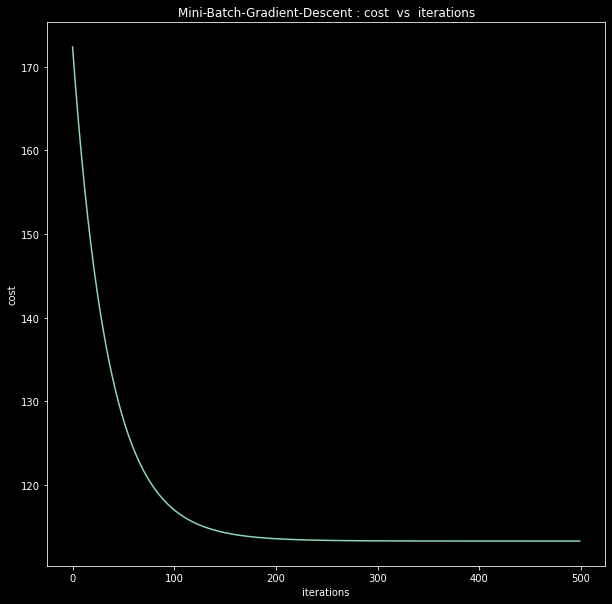

 
 
MSE : 0.9812237943654196
 
 
 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


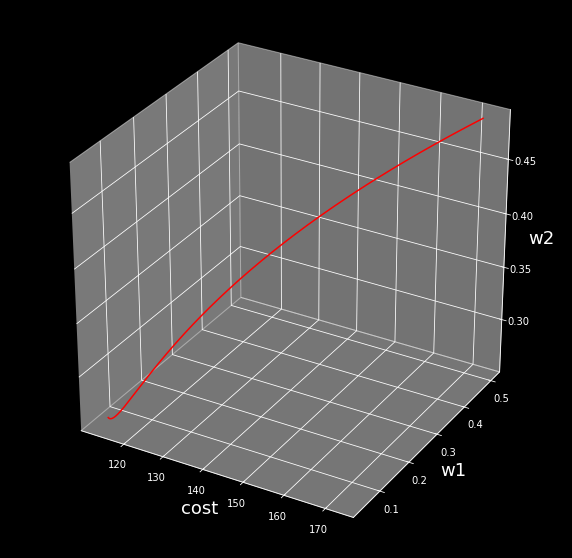

In [ ]:
print(" ")
print(" ")
print(" ")
print("MINI BATCH GRADIENT DESCENT")
print(" ")
w0_mbgd, w1_mbgd, w2_mbgd, cost_mbgd, w1_list_mbgd, w2_list_mbgd = mini_batch(x1, x2, y)
print("W0 :", w0_mbgd)
print("W1 :", w1_mbgd)
print("W2 :", w2_mbgd)
print(" ")
plot2d("cost", "iterations", cost_mbgd, "Mini-Batch-Gradient-Descent")
print(" ")
plot3d(cost_mbgd, w1_list_mbgd, w2_list_mbgd, "cost", "w1", "w2", "Mini-Batch-Gradient-Descent")
print(" ")
mse_mbgd = pred(w0_mbgd, w1_mbgd, w2_mbgd, X1, X2, Y)
print(" ")
print(" ")
print(" ")
time.sleep(5)

A function to calculate stochastic gradient descent

In [ ]:
def stochastic_gradient_descent(x1, x2, y):
    # batch = 15 #batch size
    alpha = 0.00001  # learning rate
    iter = 9999
    # initializing the learning rates to random values between 0 & 1
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    # grabbing x0 as np.ones for future use
    x0 = np.ones(x1.shape[0])
    cost = [0 for i in range(iter)]
    w0_list = [1 for i in range(iter)]
    w1_list = [1 for i in range(iter)]
    w2_list = [1 for i in range(iter)]
    h = hypothesis(w0, w1, w2, x1, x2)
    for itr in range(0, iter):
        i = random.randint(0, y.shape[0] - 1)
        w0 = w0 - alpha * ((h[i] - y[i]) * x0[i])
        w1 = w1 - alpha * ((h[i] - y[i]) * x1[i])
        w2 = w2 - alpha * ((h[i] - y[i]) * x2[i])
        w0_list[itr] = w0
        w1_list[itr] = w1
        w2_list[itr] = w2
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[itr] = 0.5 * mse(h, y, y.shape[0])
    return w0, w1, w2, cost, w1_list, w2_list


<h3> Q2 (ii) </h3> <br>

 
 
 
STOCHASTIC GRADIENT DESCENT
W0 : 0.21575566483721706
W1 : 0.647163530095625
W2 : 0.23958373983709216
 


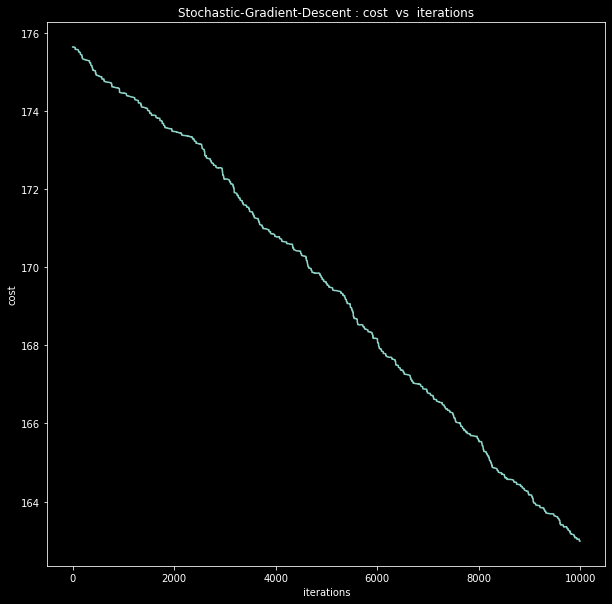

 
 
MSE : 1.5331005052260118


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


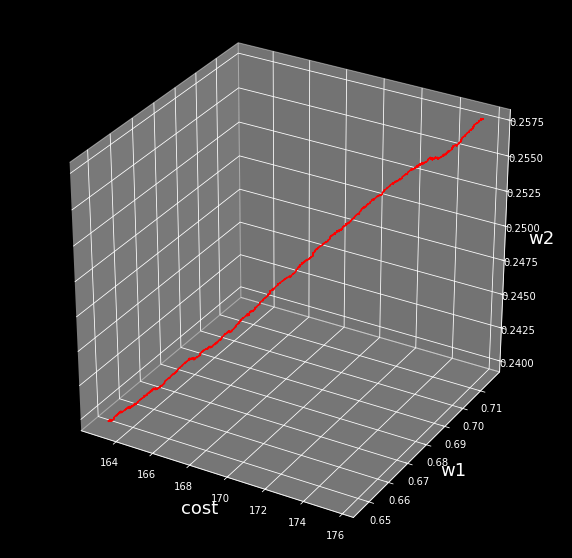

In [ ]:
print(" ")
print(" ")
print(" ")
print("STOCHASTIC GRADIENT DESCENT")
w0_sgd, w1_sgd, w2_sgd, cost_sgd, w1_list_sgd, w2_list_sgd = stochastic_gradient_descent(x1, x2, y)
print("W0 :", w0_sgd)
print("W1 :", w1_sgd)
print("W2 :", w2_sgd)
print(" ")
plot2d("cost", "iterations", cost_sgd, "Stochastic-Gradient-Descent")
print(" ")
plot3d(cost_sgd, w1_list_sgd, w2_list_sgd, "cost", "w1", "w2", "Stochastic-Gradient-Descent")
print(" ")
mse_sgd = pred(w0_sgd, w1_sgd, w2_sgd, X1, X2, Y)
time.sleep(5)

In [ ]:
def wsquare(w0,w1,w2):
    sum = 0
    sum = sum + w0 ** 2
    sum = sum + w1 ** 2
    sum = sum + w2 ** 2
    return sum


Function to calculte ridge regression - batch gradient descent

In [ ]:
def ridge_batch_gradient_descent(x1, x2, y):
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
    iters = 300
    alpha = 0.0001
    lamb = 0.05
    h = hypothesis(w0, w1, w2, x1, x2)
    cost = [0 for i in range(iters)]
    w0_list = [1 for i in range(iters)]
    w1_list = [1 for i in range(iters)]
    w2_list = [1 for i in range(iters)]
    for i in range(0, iters):
        w0 = (1-(alpha*lamb))*w0 - alpha * summa(h, y.shape[0], y, x0)
        w1 = (1-(alpha*lamb))*w1 - alpha * summa(h, y.shape[0], y, x1)
        w2 = (1-(alpha*lamb))*w2 - alpha * summa(h, y.shape[0], y, x2)
        w0_list[i] = w0
        w1_list[i] = w1
        w2_list[i] = w2
        wsum = wsquare(w0,w1,w2)
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[i] = (1 * 0.5 * mse(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
    return w0, w1, w2, cost, w1_list, w2_list

<h3> Q3 </h3> <br>

BATCH GRADIENT DESCENT (RIDGE REGRESSION)
 
W0 : 0.00019472518776612725
W1 : 0.04228959744525935
W2 : 0.2597224807279039
 


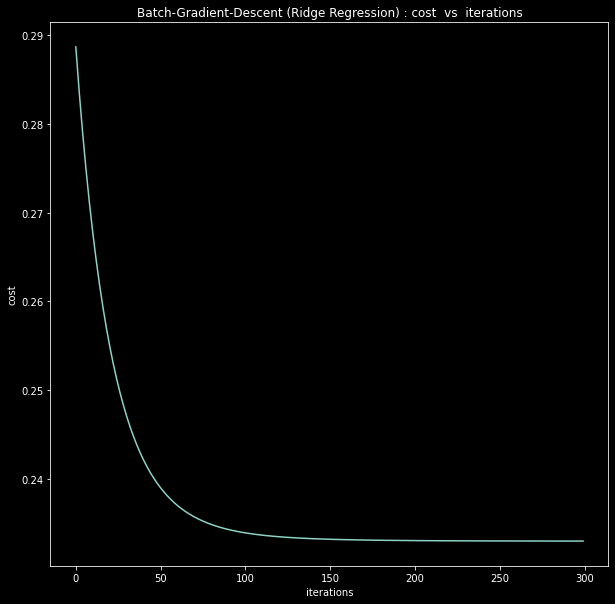

 
 
MSE : 0.9809989524533262


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


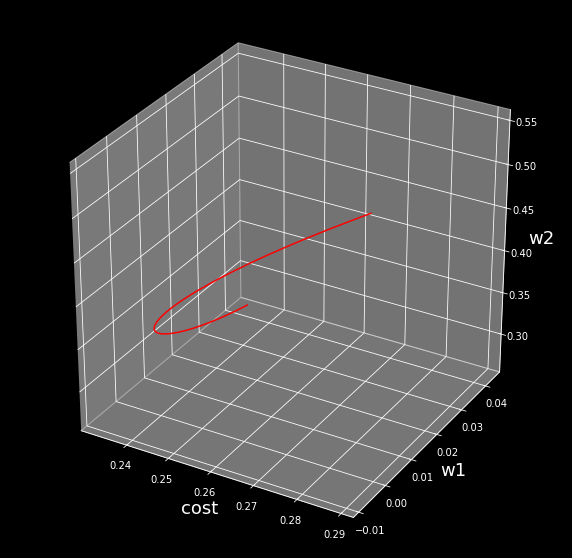

In [ ]:
print("BATCH GRADIENT DESCENT (RIDGE REGRESSION)")
print(" ")
w0_r_bgd, w1_r_bgd, w2_r_bgd, cost_r_bgd, w1_list_r_bgd, w2_list_r_bgd = ridge_batch_gradient_descent(x1, x2, y)
print("W0 :", w0_r_bgd)
print("W1 :", w1_r_bgd)
print("W2 :", w2_r_bgd)
print(" ")
plot2d("cost", "iterations", cost_r_bgd, "Batch-Gradient-Descent (Ridge Regression)")
print(" ")
plot3d(cost_r_bgd, w1_list_r_bgd, w2_list_r_bgd, "cost", "w1", "w2", "Batch-Gradient-Descent (RIdge Regression)")
print(" ")
mse_r_bgd = pred(w0_r_bgd, w1_r_bgd, w2_r_bgd, X1, X2, Y)
time.sleep(5)
print(" ")
print(" ")
print(" ")

A function to calculate mini batch gradient descent , using ridge regression

In [ ]:
def ridge_mini_batch(x1, x2, y):
    iters = 500
    batch = 5
    alpha = 0.00001
    lamb = 0.05
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
    # h = hypothesis(w0, w1, w2, x1, x2)
    cost = [0 for i in range(iters)]
    w0_list = [1 for i in range(iters)]
    w1_list = [1 for i in range(iters)]
    w2_list = [1 for i in range(iters)]
    for i in range(0, iters):
        temp = np.column_stack((x1, x2, y))
        np.random.shuffle(temp)
        x1, x2, y = split1(temp)
        # print(temp[:,2].shape)
        # print(x1.shape, " ", x2.shape, " ", y.shape)
        for j in range(0, batch):
            h = hypothesis(w0, w1, w2, x1, x2)
            w0 = (1-(alpha*lamb))*w0 - alpha * summa(h, x0.shape[0], y, x0)
            w1 = (1-(alpha*lamb))*w1 - alpha * summa(h, x1.shape[0], y, x1)
            w2 = (1-(alpha*lamb))*w2 - alpha * summa(h, x2.shape[0], y, x2)
            w0_list[i] = w0
            w1_list[i] = w1
            w2_list[i] = w2
            wsum = wsquare(w0,w1,w2)
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[i] = (1 * 0.5 * mse(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
    return w0, w1, w2, cost, w1_list, w2_list


 
 
 
MINI BATCH GRADIENT DESCENT (RIDGE REGRESSION)
 
W0 : 0.00038883068868421475
W1 : 0.04216378581389606
W2 : 0.259927470072459
 


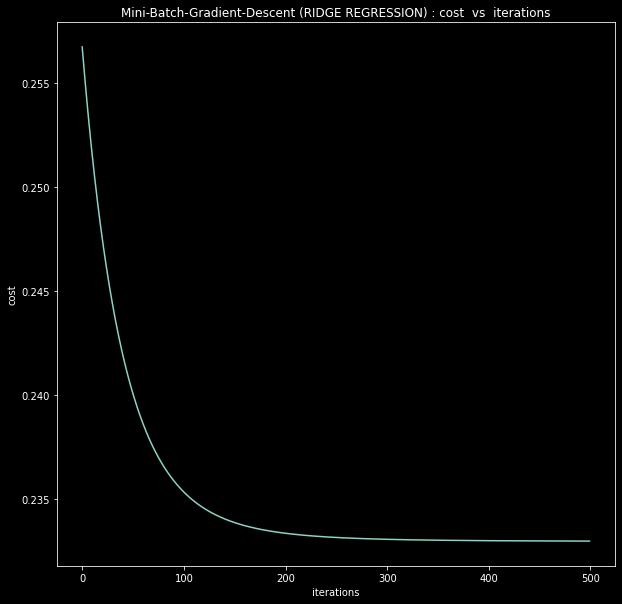

 
 
MSE : 0.9810032901730549
 
 
 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


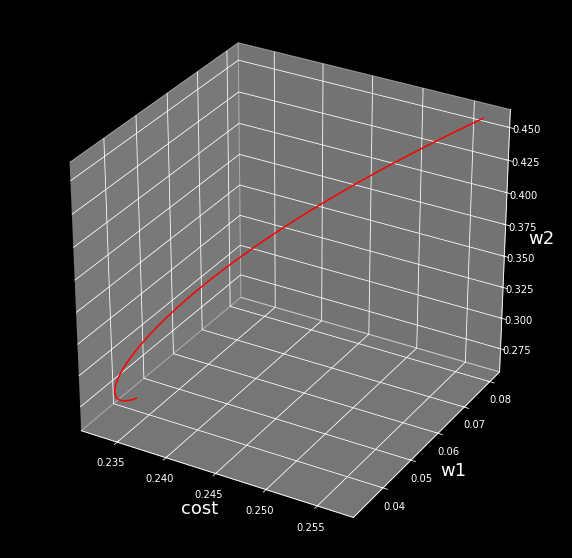

In [ ]:
print(" ")
print(" ")
print(" ")
print("MINI BATCH GRADIENT DESCENT (RIDGE REGRESSION)")
print(" ")
w0_r_mbgd, w1_r_mbgd, w2_r_mbgd, cost_r_mbgd, w1_list_r_mbgd, w2_list_r_mbgd = ridge_mini_batch(x1, x2, y)
print("W0 :", w0_r_mbgd)
print("W1 :", w1_r_mbgd)
print("W2 :", w2_r_mbgd)
print(" ")
plot2d("cost", "iterations", cost_r_mbgd, "Mini-Batch-Gradient-Descent (RIDGE REGRESSION)")
print(" ")
plot3d(cost_r_mbgd, w1_list_r_mbgd, w2_list_r_mbgd, "cost", "w1", "w2", "Mini-Batch-Gradient-Descent (RIDGE REGRESSION)")
print(" ")
mse_r_mbgd = pred(w0_r_mbgd, w1_r_mbgd, w2_r_mbgd, X1, X2, Y)
print(" ")
print(" ")
print(" ")
time.sleep(5)

A function to calculate stochastic gradient descent , using ridge regression

In [ ]:
def ridge_stochastic_gradient_descent(x1, x2, y):
    # batch = 15 #batch size
    alpha = 0.00001  # learning rate
    lamb = 0.6
    iter = 9999
    # initializing the learning rates to random values between 0 & 1
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    # grabbing x0 as np.ones for future use
    x0 = np.ones(x1.shape[0])
    cost = [0 for i in range(iter)]
    w0_list = [1 for i in range(iter)]
    w1_list = [1 for i in range(iter)]
    w2_list = [1 for i in range(iter)]
    h = hypothesis(w0, w1, w2, x1, x2)
    for itr in range(0, iter):
        i = random.randint(0, y.shape[0] - 1)
        w0 = (1- (alpha* lamb ))* w0 - alpha * ((h[i] - y[i]) * x0[i])
        w1 = (1- (alpha* lamb ))* w1 - alpha * ((h[i] - y[i]) * x1[i])
        w2 = (1- (alpha* lamb ))* w2 - alpha * ((h[i] - y[i]) * x2[i])
        w0_list[itr] = w0
        w1_list[itr] = w1
        w2_list[itr] = w2
        wsum = wsquare(w0,w1,w2)
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[itr] = (1 * 0.5 * mse(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
    return w0, w1, w2, cost, w1_list, w2_list

 
 
 
STOCHASTIC GRADIENT DESCENT (RIDGE REGRESSION)
W0 : 0.5154353879360026
W1 : 0.2619286714110786
W2 : 0.4327127068198999
 


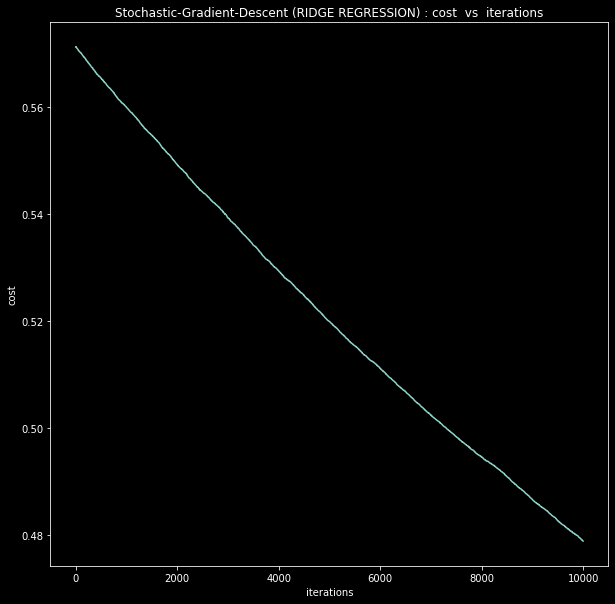

 
 
MSE : 1.4221501376055379


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


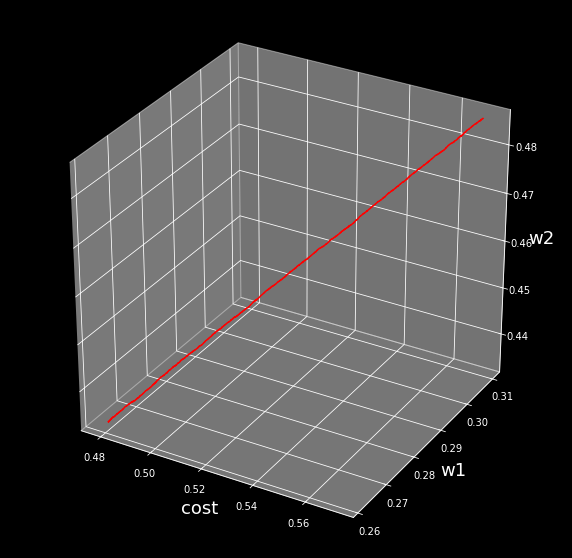

In [ ]:
print(" ")
print(" ")
print(" ")
time.sleep(5)
print("STOCHASTIC GRADIENT DESCENT (RIDGE REGRESSION)")
w0_r_sgd, w1_r_sgd, w2_r_sgd, cost_r_sgd, w1_list_r_sgd, w2_list_r_sgd = ridge_stochastic_gradient_descent(x1, x2, y)
print("W0 :", w0_r_sgd)
print("W1 :", w1_r_sgd)
print("W2 :", w2_r_sgd)
print(" ")
plot2d("cost", "iterations", cost_r_sgd, "Stochastic-Gradient-Descent (RIDGE REGRESSION)")
print(" ")
plot3d(cost_r_sgd, w1_list_r_sgd, w2_list_r_sgd, "cost", "w1", "w2", "Stochastic-Gradient-Descent (RIDGE REGRESSION)")
print(" ")
mse_r_sgd = pred(w0_r_sgd, w1_r_sgd, w2_r_sgd, X1, X2, Y)
time.sleep(5)

In [ ]:
def wabs(w0,w1,w2):
  w0 = abs(w0)
  w1 = abs(w1)
  w2 = abs(w2)
  return w0+w1+w2


<h3> Q4 </h3>

Showing the derivation for LAR

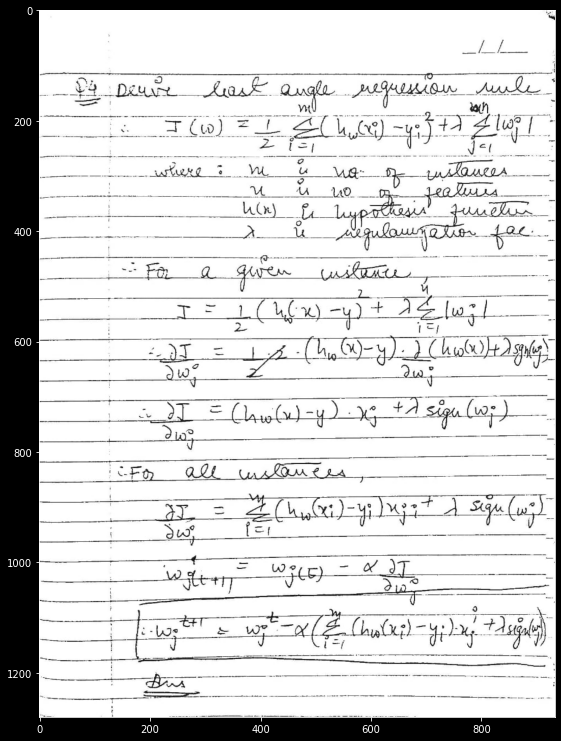

In [ ]:
import cv2
import os
str1 = os.getcwd()
#image = cv2.imread(os.getcwd+'NNFL-Q4.jpeg')
str1 = str1 +'/NNFL-Q4.jpeg'
str1
img = cv2.imread(str1)
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"] = (25, 13)
plt.imshow(img_cvt)
plt.show()

Calculate batch gradient descent , using least angle regression

In [ ]:
def least_angle_regression_batch(x1,x2,y):
  lamb = 0.2
  alpha = 0.0005
  iter = 500
  # initializing the learning rates to random values between 0 & 1
  w0 = random.uniform(0, 1)
  w1 = random.uniform(0, 1)
  w2 = random.uniform(0, 1)
  # grabbing x0 as np.ones for future use
  x0 = np.ones(x1.shape[0])
  cost = [0 for i in range(iter)]
  w0_list = [1 for i in range(iter)]
  w1_list = [1 for i in range(iter)]
  w2_list = [1 for i in range(iter)]
  for i in range(0,iter):
    h = hypothesis(w0, w1, w2, x1, x2)
    w0 = w0 - alpha * summa(h, y.shape[0], y, x0) - alpha * lamb * np.sign(w0) * 0.5
    w1 = w1 - alpha * summa(h, y.shape[0], y, x1) - alpha * lamb * np.sign(w1) * 0.5
    w2 = w2 - alpha * summa(h, y.shape[0], y, x2) - alpha * lamb * np.sign(w2) * 0.5
    w0_list[i] = w0
    w1_list[i] = w1
    w2_list[i] = w2
    wsum = wabs(w0,w1,w2)
    cost[i] = (1 * 0.5 * mse(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
  return w0, w1, w2, cost, w1_list, w2_list


BATCH GRADIENT DESCENT (Least Angle Regression)
 
W0 : -2.6631158454282064e-05
W1 : 0.04273185912026614
W2 : 0.25866699471771293
 


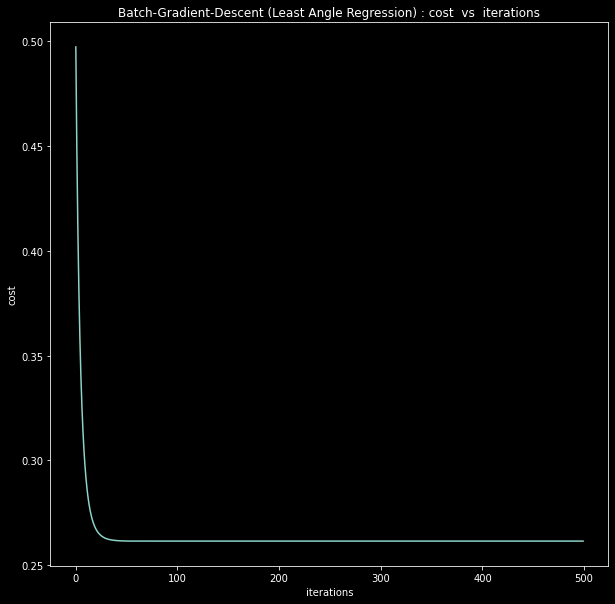

 
 
MSE : 0.9809284828513127


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


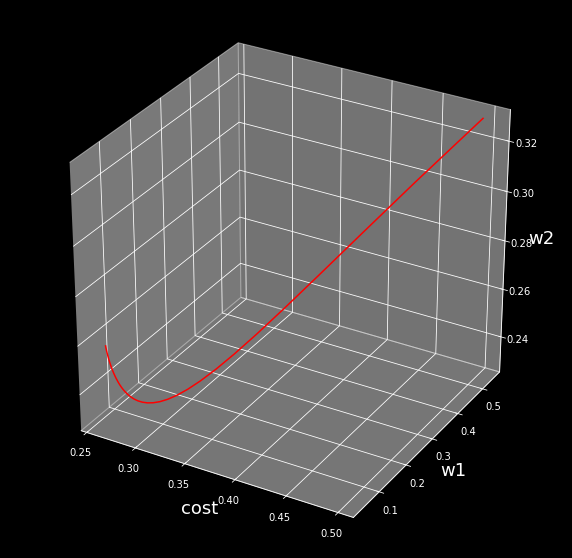

In [ ]:
print("BATCH GRADIENT DESCENT (Least Angle Regression)")
print(" ")
w0_lar_bgd, w1_lar_bgd, w2_lar_bgd, cost_lar_bgd, w1_list_lar_bgd, w2_list_lar_bgd = least_angle_regression_batch(x1, x2, y)
print("W0 :", w0_lar_bgd)
print("W1 :", w1_lar_bgd)
print("W2 :", w2_lar_bgd)
print(" ")
plt.rcParams["figure.figsize"] = (10, 10)

plot2d("cost", "iterations", cost_lar_bgd, "Batch-Gradient-Descent (Least Angle Regression)")
print(" ")
plot3d(cost_lar_bgd, w1_list_lar_bgd, w2_list_lar_bgd, "cost", "w1", "w2", "Batch-Gradient-Descent (Least Angle Regression)")
print(" ")
mse_lar_bgd = pred(w0_lar_bgd, w1_lar_bgd, w2_lar_bgd, X1, X2, Y)
time.sleep(5)

Calculate mini batch gradient descent , using least angle regression

In [ ]:
def least_angle_mini_batch(x1, x2, y):
    iters = 500
    batch = 5
    alpha = 0.00001
    lamb = 0.05
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    x0 = np.ones(x1.shape[0])
    # h = hypothesis(w0, w1, w2, x1, x2)
    cost = [0 for i in range(iters)]
    w0_list = [1 for i in range(iters)]
    w1_list = [1 for i in range(iters)]
    w2_list = [1 for i in range(iters)]
    for i in range(0, iters):
        temp = np.column_stack((x1, x2, y))
        np.random.shuffle(temp)
        x1, x2, y = split1(temp)
        # print(temp[:,2].shape)
        # print(x1.shape, " ", x2.shape, " ", y.shape)
        for j in range(0, batch):
            h = hypothesis(w0, w1, w2, x1, x2)
            w0 = w0 - alpha * summa(h, y.shape[0], y, x0) - alpha * lamb * np.sign(w0) * 0.5
            w1 = w1 - alpha * summa(h, y.shape[0], y, x1) - alpha * lamb * np.sign(w1) * 0.5
            w2 = w2 - alpha * summa(h, y.shape[0], y, x2) - alpha * lamb * np.sign(w2) * 0.5
            w0_list[i] = w0
            w1_list[i] = w1
            w2_list[i] = w2
            wsum = wsquare(w0,w1,w2)
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[i] = (1 * 0.5 * mse(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
    return w0, w1, w2, cost, w1_list, w2_list

MINI BATCH GRADIENT DESCENT (Least Angle Regression)
 
W0 : -1.0541185267907262e-07
W1 : 0.04381441146988094
W2 : 0.2586172738583333
 


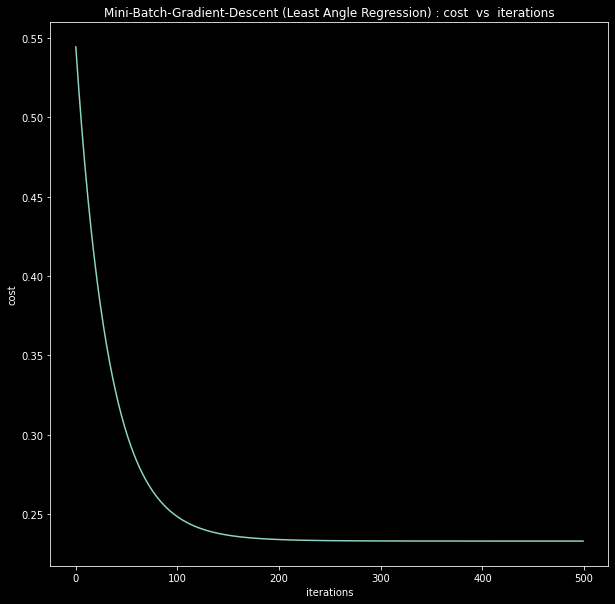

 
 
MSE : 0.9811854733419773
 
 
 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


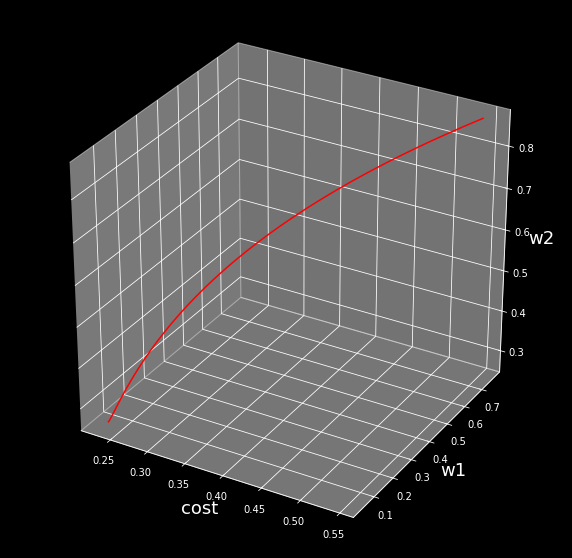

In [ ]:
print("MINI BATCH GRADIENT DESCENT (Least Angle Regression)")
print(" ")
w0_lar_mbgd, w1_lar_mbgd, w2_lar_mbgd, cost_lar_mbgd, w1_list_lar_mbgd, w2_list_lar_mbgd = least_angle_mini_batch(x1, x2, y)
print("W0 :", w0_lar_mbgd)
print("W1 :", w1_lar_mbgd)
print("W2 :", w2_lar_mbgd)
print(" ")
plot2d("cost", "iterations", cost_lar_mbgd, "Mini-Batch-Gradient-Descent (Least Angle Regression)")
print(" ")
plot3d(cost_lar_mbgd, w1_list_lar_mbgd, w2_list_lar_mbgd, "cost", "w1", "w2", "Mini-Batch-Gradient-Descent (Least Angle Regression)")
print(" ")
mse_lar_mbgd = pred(w0_lar_mbgd, w1_lar_mbgd, w2_lar_mbgd, X1, X2, Y)
print(" ")
print(" ")
print(" ")
time.sleep(5)

A function to calculate stochastic gradient descent , using least angle regression

In [ ]:
def least_angle_stochastic_gradient_descent(x1, x2, y):
    # batch = 15 #batch size
    alpha = 0.00001  # learning rate
    lamb = 0.09
    iter = 9999
    # initializing the learning rates to random values between 0 & 1
    w0 = random.uniform(0, 1)
    w1 = random.uniform(0, 1)
    w2 = random.uniform(0, 1)
    # grabbing x0 as np.ones for future use
    x0 = np.ones(x1.shape[0])
    cost = [0 for i in range(iter)]
    w0_list = [1 for i in range(iter)]
    w1_list = [1 for i in range(iter)]
    w2_list = [1 for i in range(iter)]
    h = hypothesis(w0, w1, w2, x1, x2)
    for itr in range(0, iter):
        i = random.randint(0, y.shape[0] - 1)
        w0 = w0 - alpha * summa(h, y.shape[0], y, x0) - alpha * lamb * np.sign(w0) * 0.5
        w1 = w1 - alpha * summa(h, y.shape[0], y, x1) - alpha * lamb * np.sign(w1) * 0.5
        w2 = w2 - alpha * summa(h, y.shape[0], y, x2) - alpha * lamb * np.sign(w2) * 0.5
        w0_list[itr] = w0
        w1_list[itr] = w1
        w2_list[itr] = w2
        wsum = wabs(w0,w1,w2)
        h = hypothesis(w0, w1, w2, x1, x2)
        cost[itr] = (1 * 0.5 * mse(h, y, y.shape[0])/x1.shape[0] + lamb * wsum) * 0.5
    return w0, w1, w2, cost, w1_list, w2_list

 
 
 
STOCHASTIC GRADIENT DESCENT (Least Angle Regression)
W0 : -2.2527596434875948e-07
W1 : 0.04290842020282322
W2 : 0.2588435401067283
 


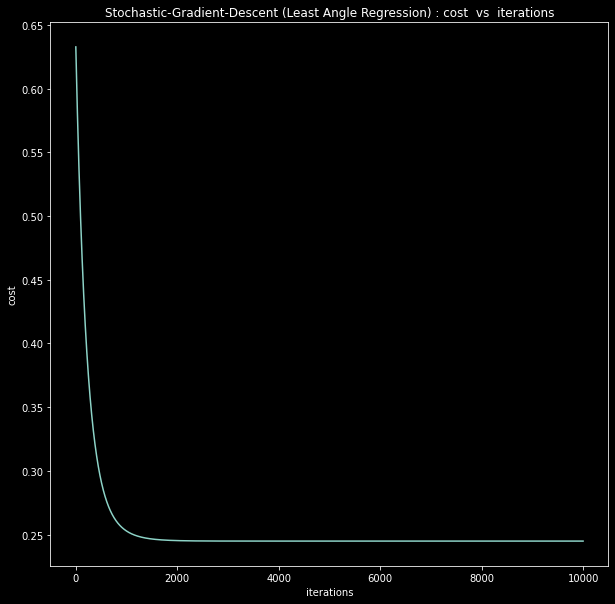

 
 
MSE : 0.9810012885080494


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


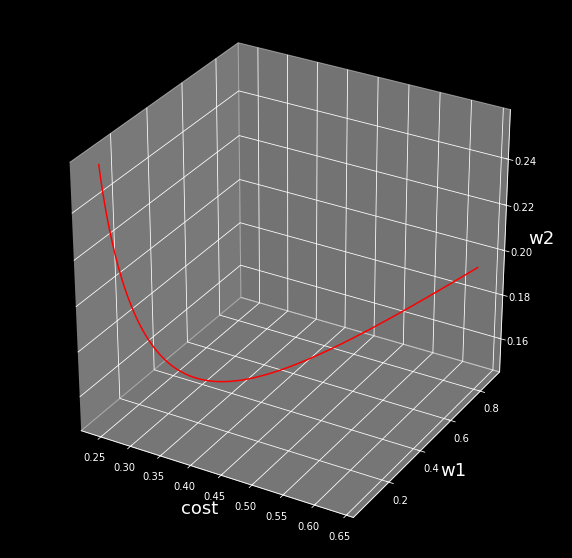

In [ ]:
print(" ")
print(" ")
print(" ")
time.sleep(5)
print("STOCHASTIC GRADIENT DESCENT (Least Angle Regression)")
w0_lar_sgd, w1_lar_sgd, w2_lar_sgd, cost_lar_sgd, w1_list_lar_sgd, w2_list_lar_sgd = least_angle_stochastic_gradient_descent(x1, x2, y)
print("W0 :", w0_lar_sgd)
print("W1 :", w1_lar_sgd)
print("W2 :", w2_lar_sgd)
print(" ")
plot2d("cost", "iterations", cost_lar_sgd, "Stochastic-Gradient-Descent (Least Angle Regression)")
print(" ")
plot3d(cost_lar_sgd, w1_list_lar_sgd, w2_list_lar_sgd, "cost", "w1", "w2", "Stochastic-Gradient-Descent (Least Angle Regression)")
print(" ")
mse_lar_sgd = pred(w0_lar_sgd, w1_lar_sgd, w2_lar_sgd, X1, X2, Y)
time.sleep(5)

<h3> Q5 </h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import time
from tabulate import tabulate

In [ ]:
def hypothesis_v(theta, X, Y):
  h = (np.matmul(X, theta))
  for i in range(0, h.shape[0]):
      h[i] = h[i]-Y[i]
  return h

In [ ]:
def batch_gradient_descent_vi(x, y, w):
    iters = 300
    cost = [0 for i in range(iters)]
    w_list = np.ones(shape = (iters,w.shape[1]))
    y = y.reshape(245,1)
    w = w.T
    for i in range(0,iters):
        w = np.linalg.inv(x.T @ x) @ x.T @ y
    return w

In [ ]:
def ridge_batch_gradient_descent_vi(x, y, w):
    iters = 300
    lamb = 0.05
    cost = [0 for i in range(iters)]
    w_list = np.ones(shape = (iters,w.shape[1]))
    y = y.reshape(245,1)
    w = w.T
    for i in range(0,iters):
        w = np.linalg.inv((x.T @ x) + (lamb * np.identity(3)) ) @ x.T @ y
    return w

In [ ]:
def least_angle_batch_gradient_descent_vi(x, y, w):
    iters = 300
    lamb = 0.2
    cost = [0 for i in range(iters)]
    w_list = np.ones(shape = (iters,w.shape[1]))
    y = y.reshape(245,1)
    w = w.T
    for i in range(0,iters):
        w = np.linalg.inv(x.T @ x) @ ( x.T @ y - ( lamb/2 * np.sign(w) ) )
    return w

In [ ]:
def batch_gradient_descent_v(x, y, w):
  theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)
  k = np.matmul(x, theta)
  k = y - k
  temp = k.T
  cost = (np.matmul(temp, k) *0.5 )/x.shape[0]
  return theta,cost

In [ ]:
def plot3d_v(x, axis, label1, label2, label3, title):
    fig = plt.figure()
    plt.style.use('dark_background')
    plt.title(title + " : " + label1 + "  vs  " + label2 + " vs "+ label3)
    plt.rcParams["figure.figsize"] = (10, 10)
    ax = plt.axes(projection='3d')
    ax.plot3D(x, axis[:,1], axis[:,2], 'red')
    ax.set_xlabel(label1, fontsize=18)
    ax.set_ylabel(label2, fontsize=18)
    ax.set_zlabel(label3, fontsize=18)

In [ ]:
def pred_v(w, X, Y):
    pred = hypothesis_v(w, X, Y)
    mean = np.mean(pred.transpose())
    sdev = np.std(pred.transpose())
    # print(mean)
    # print(sdev)
    pred = pred * sdev + mean
    err = 0
    for i in range(0, pred.shape[0]):
        err = err + (pred[i] - Y[i]) ** 2
    err = err / pred.shape[0]
    #print("MSE :", err)
    return err

In [ ]:
x0 = np.ones(x1.shape)
X_train = np.column_stack((x0, x1, x2))
X0 = np.ones(X1.shape)
X_test = np.column_stack((X0,X1,X2))
w = np.random.randn(1, 3)
print("LINEAR REGRESSION ")
print(" ")
w_v_bgd = batch_gradient_descent_vi(X_train, y, w)
mse_v_bgd = pred_v(w_v_bgd, X_test, Y)
bgd_table = [["W0",w_v_bgd[0],w0_bgd,w0_mbgd,w0_sgd],["W1",w_v_bgd[1],w1_bgd,w1_mbgd,w1_sgd],["W2",w_v_bgd[2],w2_bgd,w2_mbgd,w2_sgd],["MSE",mse_v_bgd,mse_bgd,mse_mbgd,mse_sgd]]
print(tabulate(bgd_table,headers = ["Quantities","BGD-Vectorized","BGD","MBGD","SGD"],tablefmt="pretty"))
print("")
print(" ")
print(" ")
print("RIDGE REGRESSION")
print(" ")
w_r_v_bgd = ridge_batch_gradient_descent_vi(X_train, y, w)
mse_r_v_bgd = pred_v(w_r_v_bgd, X_test, Y)
bgd_table = [["W0",w_r_v_bgd[0],w0_r_bgd,w0_r_mbgd,w0_r_sgd],["W1",w_r_v_bgd[1],w1_r_bgd,w1_r_mbgd,w1_r_sgd],["W2",w_r_v_bgd[2],w2_r_bgd,w2_r_mbgd,w2_r_sgd],["MSE",mse_r_v_bgd,mse_r_bgd,mse_r_mbgd,mse_r_sgd]]
print(tabulate(bgd_table,headers = ["Quantities","Ridge-Vectorized","Ridge-BGD","Ridge-MBGD", "Ridge-SGD"],tablefmt="pretty"))
print(" ")
print(" ")
print("LEAST ANGLE REGRESSION")
print(" ")
w_lar_v_bgd = least_angle_batch_gradient_descent_vi(X_train, y, w)
mse_lar_v_bgd = pred_v(w_lar_v_bgd, X_test, Y)
bgd_table = [["W0",w_lar_v_bgd[0],w0_lar_bgd,w0_lar_mbgd,w0_lar_sgd],["W1",w_lar_v_bgd[1],w1_lar_bgd,w1_lar_mbgd,w1_lar_sgd],["W2",w_lar_v_bgd[2],w2_lar_bgd,w2_lar_mbgd,w2_lar_sgd],["MSE",mse_lar_v_bgd,mse_lar_bgd,mse_lar_mbgd,mse_lar_sgd]]
print(tabulate(bgd_table,headers = ["Quantities","Least Angle - Vectorization","Least Angle - BGD","Least Angle - MBGD","Least Angle - SGD"],tablefmt="pretty"))
#print(cost)
#print(" ")
#plot2d("cost", "iterations", cost, "Batch-Gradient-Descent")
#print(" ")
#plot3d_v(cost, w_list, "cost", "w1", "w2", "Batch-Gradient-Descent")
#print(" ")


LINEAR REGRESSION 
 
+------------+------------------+------------------------+-----------------------+---------------------+
| Quantities |  BGD-Vectorized  |          BGD           |         MBGD          |         SGD         |
+------------+------------------+------------------------+-----------------------+---------------------+
|     W0     | [1.17961196e-15] | 0.00010073333447893473 | 0.0008854695674893143 | 0.21575566483721706 |
|     W1     |   [0.04305287]   |  0.04371084620195409   | 0.044509529962515094  |  0.647163530095625  |
|     W2     |    [0.258988]    |  0.25837730369557094   |  0.25781772978742457  | 0.23958373983709216 |
|    MSE     |   [3.85222457]   |   0.9811196960335471   |  0.9812237943654196   | 1.5331005052260118  |
+------------+------------------+------------------------+-----------------------+---------------------+

 
 
RIDGE REGRESSION
 
+------------+------------------+------------------------+------------------------+--------------------+
| Quantiti

<h3> Q6 </h3>

In [ ]:
#data = np.array(pd.read_csv("data2.csv",header = None))
data = read('data2')
data = np.asarray(data)
k = 3
m,n = data.shape
centroids = np.zeros((n,k))
a = 0
b = 50
for j in range(0,k):
  for i in range(0,n):
    centroids[i][j] = np.sum(data[a:b,i])/50
  a = a + 50
  b = b + 50
clusters={}
iters = 100
converged = False
itr = 0
prev_centroids = centroids.copy()
while converged!=True:
      distance=np.array([]).reshape(m,0)
      for i in range(k):
          temp=np.sum((data-centroids[:,i])**2,axis=1)
          distance=np.c_[distance,temp]
      C=np.argmin(EuclideanDistance,axis=1)
      Y={}
      for i in range(k):
          Y[i]=np.array([]).reshape(n,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],data[i]]
      for i in range(k):
          Y[i]=Y[i].T
      for i in range(k):
          Centroids[:,i]=np.mean(Y[i],axis=0)
      clusters=Y
      if (prev_centroids == centroids).all():
        converged = True
      elif itr==iters:
        converged = True
      itr+=1
      prev_centroids = centroids.copy()

Centroids are 
 [[5.006 3.418 1.464 0.244]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
Converged at 1 iterations


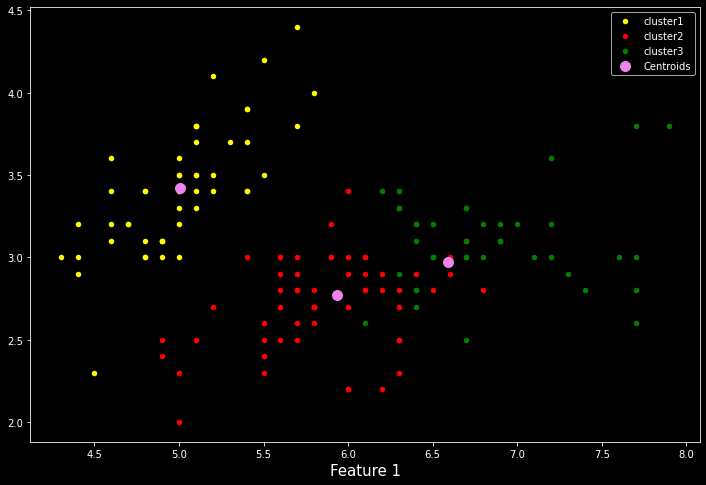

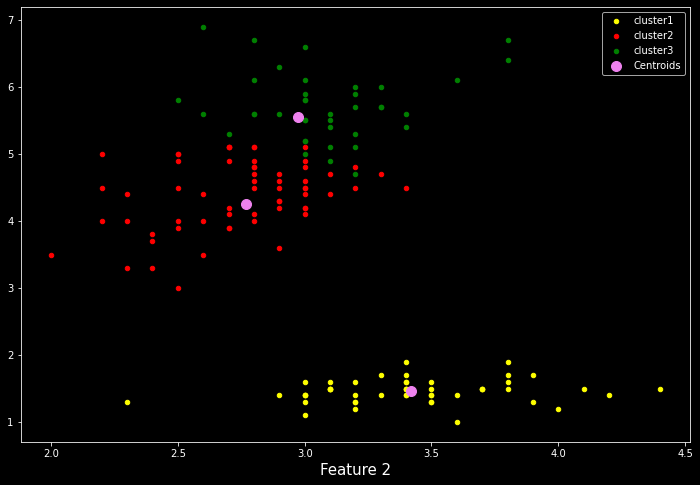

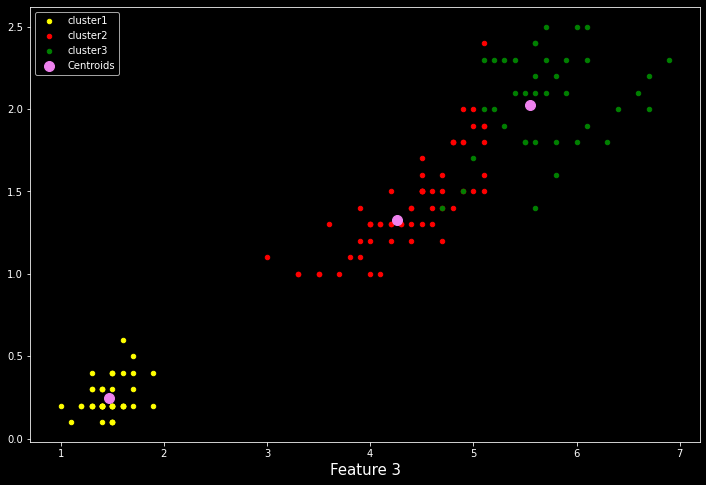

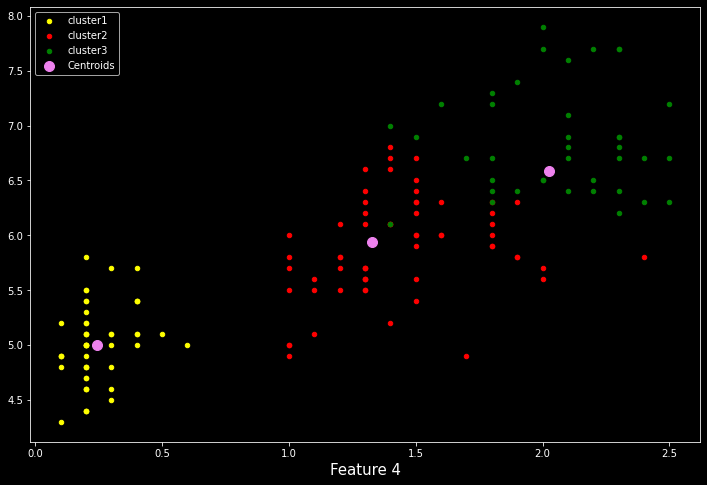

In [ ]:
color=['yellow','red','green']
labels=['cluster1','cluster2','cluster3']
print("Centroids are","\n",centroids.T)
print("Converged at",itr,"iterations")
plt.style.use("dark_background")
plt.rcParams["figure.figsize"] = (12, 8)
for i in range(k):
    plt.scatter(clusters[i][:,0],clusters[i][:,1],s= 20,c=color[i], label = labels[i])
plt.scatter(centroids[0,:],centroids[1,:],s=100,c='violet',label='Centroids')
plt.xlabel("Feature 1",fontsize = 15)
plt.legend()
plt.show()
for i in range(k):
    plt.scatter(clusters[i][:,1],clusters[i][:,2],s= 20,c=color[i], label = labels[i])
plt.xlabel("Feature 2",fontsize = 15)
plt.scatter(centroids[1,:],centroids[2,:],s=100,c='violet',label='Centroids')
plt.legend()
plt.show()
for i in range(k):
    plt.scatter(clusters[i][:,2],clusters[i][:,3],s= 20,c=color[i], label = labels[i])
plt.scatter(centroids[2,:],centroids[3,:],s=100,c='violet',label='Centroids')
plt.xlabel("Feature 3",fontsize = 15)
plt.legend()
plt.show()
for i in range(k):
    plt.scatter(clusters[i][:,3],clusters[i][:,0],s= 20,c=color[i], label = labels[i])
plt.scatter(centroids[3,:],centroids[0,:],s=100,c='violet',label='Centroids')
plt.xlabel("Feature 4", fontsize = 15)
plt.legend()
plt.show()

<h3> Q7 </h3>

In [ ]:
def sigmoid(x) :
    return 1/(1 + np.exp(-x))

#Function to calculate cost function
def cost_calc(h, Y) :
    return -(Y * np.log(h + 1e-6) + (1 - Y) * np.log(1 - h + 1e-6))

#Funciton to calculate hypothesis
def hypothesis_calc(size,w,X):
  g = np.ones(size)
  for i in range(0,size):
    for j in range(0,5):
      g[i] += w[j] * X[i][j]
    g[i] = sigmoid(g[i])
  return g

#Function to calculate gradient
def gradient_calc(size, error, X):
  grad = np.ones(5)
  for i in range(0,5):
    for j in range(0,size):
      grad[i] += error[j] * X[j][i]
  return grad

In [ ]:
data = read('data3')
data = data.to_numpy()
np.random.shuffle(data)     
data = np.insert(data, 0, 1, axis  = 1)
X = data[0:60, :-1]
Y = data[0:60, -1]
X_test = data[60:100, :-1]
Y_test = data[60:100, -1]
Y -= 1
Y_test -= 1
w = np.random.rand(5)
iters = 800
alpha = 1e-2

def logistic_reg(X,Y,w,alpha, iters):
  prev_cost = 0
  e = 1e-6
  itr = 0
  converged = False
  while converged!= True:
    cost = 0
    h = hypothesis_calc(60, w, X)
    error = h-Y
    cost = np.mean(cost_cal(h, Y))
    gradient = gradient_calc(60, error, X)
    for j in range(0,5):
      w[j] -= alpha * gradient[j]
    if(abs(prev_cost - cost))<=e:
      converged = True
    if itr>=iters:
      converged = True
    itr+=1
    prev_cost = cost
  print("Cost converged to",cost,"in", itr, "iterations")
  print("Weights are " ,w)
  return w

w = logistic_reg(X,Y,w,alpha,iters)

TN, FN, TP, FP = 0, 0, 0, 0     #(True negative, false negative,true positive, false positive)
Y_pred = hypothesis_cal(40,w, X_test)

Y_pred[Y_pred > 0.5] = 1
Y_pred[Y_pred <= 0.5] = 0

TP = np.sum(Y_pred * Y_test)
FP = np.sum(Y_pred * (1-Y_test))
FN = np.sum((1-Y_pred) * Y_test)
TN = np.sum((1-Y_pred) * (1-Y_test))

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
accuracy = (TP + TN)/(TP + TN + FP + FN)
print("True positive: ", TP)
print("True negative: ", TN)
print("False positive: ", FP)
print("False negative: ", FN)
print("Sensitivity :",sensitivity)
print("Specificity :",specificity)
print("Accuracy    :" ,accuracy)

Cost converged to 0.008766895233306371 in 34 iterations
Weights are  [-0.37391641 -0.91604448 -2.02884418  3.25180703  1.12150254]
True positive:  24.0
True negative:  16.0
False positive:  0.0
False negative:  0.0
Sensitivity : 1.0
Specificity : 1.0
Accuracy    : 1.0


<h3> Q8 </h3>

In [ ]:
# Calculate gradients
def gradient(x, w):
    grad = np.zeros(8)
    h = 0
    for i in range(0,8):
      h+= w[i]*x[i]
    h = sigmoid(h)
    for i in range(8):
      grad[i] = (h-x[-1])*x[i]
    return grad

# Training function
def training(data, num_iter):
    w = np.zeros(8)
    for i in range(num_iter):
        x = data[random.randint(0,len(data)-1)] 
        grad = gradient(x, w)
        for j in range(8):
          w[j] = w[j] - learningRate*grad[j]
    return w

One vs One

In [ ]:
data = read('data4')
data.iloc[:,:-1]=(data.iloc[:,:-1]-(data.iloc[:,:-1]).mean())/(data.iloc[:,:-1]).std()      #Normalising the features
data = data.to_numpy()
np.random.shuffle(data)       #Randomly shuffling dataset
data = np.insert(data, 0, 1, axis = 1)

#60% training and 40% test
train, test = data[0:90],data[90:150]

#3 one vs one models
model1, model2, model3 = [], [], []

for row in train:
    
    if row[-1] == 1:
        model1.append(row)
        model2.append(row)

    elif row[-1] == 2:
        model1.append(row)
        model3.append(row)

    elif row[-1] == 3:
        model2.append(row)
        model3.append(row)

model1, model2, model3 = np.array(model1), np.array(model2), np.array(model3)

for row in model1:
    row[-1] = 0 if row[-1] == 1 else 1        #class 1 and class 2 binary classification

for row in model2:
    row[-1] = 0 if row[-1] == 1 else 1        #class 1 vs class 3 binary classification

for row in model3:
    row[-1] = 0 if row[-1] == 2 else 1        #class 2 vs class 3 binary classification

# Initializing weights    
w = np.zeros([3, 8])

# Training weights
w[0], w[1], w[2] = training(model1, 4000), training(model2, 4000), training(model3, 4000)

confusion_matrix = np.zeros((3,3))

# Testing Loop
for row in test:

    predicted = 0
    h = []
    g = 0
    for i in range(3):
      for j in range(8):
        g += row[j] * w[i][j] 
      g = sigmoid(g)
      h.append(round(g))

    if h[0] == 0 and h[1] == 0: predicted = 1
    if h[0] == 1 and h[2] == 0: predicted = 2
    if h[1] == 1 and h[2] == 1: predicted = 3

    confusion_matrix[int(row[-1])-1, predicted-1] += 1

c1 = confusion_matrix[0,0]/np.sum(confusion_matrix[0])
c2 = confusion_matrix[1,1]/np.sum(confusion_matrix[1])
c3 = confusion_matrix[2,2]/np.sum(confusion_matrix[2])
total_accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1] + confusion_matrix[2,2])/np.sum(confusion_matrix)

print("Total accuracy: ", total_accuracy)
print("Class 1 accuracy: ", c1)
print("Class 2 accuracy: ", c2)
print("Class 3 accuracy: ", c3)
print("Confusion Matrix:\n",confusion_matrix)

Total accuracy:  0.8333333333333334
Class 1 accuracy:  1.0
Class 2 accuracy:  0.5833333333333334
Class 3 accuracy:  1.0
Confusion Matrix:
 [[19.  0.  0.]
 [ 0. 14. 10.]
 [ 0.  0. 17.]]


One vs All

In [ ]:
# Read, normalize and shuffle dataset
df = read('data4')
df.iloc[:,:-1]=(df.iloc[:,:-1]-(df.iloc[:,:-1]).mean())/(df.iloc[:,:-1]).std()      #Normalising the features
df = df.to_numpy()
np.random.shuffle(df)
df = np.insert(df, 0, 1, axis=1)

#60% training and 40% test
X, Y = data[0:90],data[90:150]

weights = np.zeros((3,8))
accuracy = np.zeros(3)
count = [0,0,0]

# Training loop
for i in range(3):  
    data = df.copy()
    X = data[ : int(0.6*len(df))]

    for row in X:
        if row[-1] == i+1:
            row[-1] = 1
        else:
            row[-1] = 0 
    weights[i] = training(X,5000)    

confusion_matrix = np.zeros((3,3))

# Testing loop
for row in Y:  

    # Count number of instances per class
    count[int(row[-1])-1] += 1
    h = np.zeros(3)
    g = 0
    for i in range(3):
      for j in range(8):
        g += row[j] * weights[i][j]
      g = sigmoid(g)
      h[i] = g 
    l = np.argmax(h) + 1     #Class with maximum h
    confusion_matrix[int(row[-1])-1, l-1] += 1

c1 = confusion_matrix[0,0]/np.sum(confusion_matrix[0])
c2 = confusion_matrix[1,1]/np.sum(confusion_matrix[1])
c3 = confusion_matrix[2,2]/np.sum(confusion_matrix[2])
total_accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1] + confusion_matrix[2,2])/np.sum(confusion_matrix)

print("Total accuracy: ", total_accuracy)
print("Class 1 accuracy: ", c1)
print("Class 2 accuracy: ", c2)
print("Class 3 accuracy: ", c3)
print(confusion_matrix)

Total accuracy:  0.9
Class 1 accuracy:  1.0
Class 2 accuracy:  0.8333333333333334
Class 3 accuracy:  0.8823529411764706
[[19.  0.  0.]
 [ 0. 20.  4.]
 [ 0.  2. 15.]]


<h3> Q9 </h3>

One vs One

In [ ]:
data = read('data4')
data.iloc[:,:-1]=(data.iloc[:,:-1]-(data.iloc[:,:-1]).mean())/(data.iloc[:,:-1]).std()
data = data.to_numpy()
np.random.shuffle(data)
data = np.insert(data, 0, 1, axis=1)

overall_accuracy = 0

#5-fold cross validation
for k in range(5):

    fold_acc = np.zeros(3)
    count = np.zeros(3)

    d_copy = data.copy()
    test = d_copy[k*int(len(data)/5) : (k+1)*int(len(data)/5)]
    train = np.delete(d_copy, np.s_[k*int(len(data)/5):(k+1)*int(len(data)/5)], 0)

    w = np.zeros((3,8))     #

    # Preparing training data
    model1, model2, model3 = [], [], [] 

    for row in train:

        if row[-1] == 1:
            model1.append(row)
            model2.append(row)  

        elif row[-1] == 2:
            model1.append(row)
            model3.append(row)  

        elif row[-1] == 3:
            model2.append(row)
            model3.append(row)  

    model1, model2, model3 = np.array(model1), np.array(model2), np.array(model3)   

    for row in model1:
        row[-1] = 0 if row[-1] == 1 else 1      #class 1 and class 2 binary classification

    for row in model2:
        row[-1] = 0 if row[-1] == 1 else 1      #class 1 and class 3 binary classification

    for row in model3:
        row[-1] = 0 if row[-1] == 2 else 1      #class 2 and class 3 binary classification 

    # Weights for all three models
    w[0], w[1], w[2] = training(model1, 1000), training(model2, 1000), training(model3, 1000)  

    for row in test:  
        count[int(row[-1])-1] += 1 
        h = []
        for i in range(3):
            g = 0
            for j in range(8):
              g += row[j] * w[i][j]
            g = sigmoid(g)
            h.append(round(g)) 

        y_pred = 0   

        if h[0] == 0 and h[1] == 0:
            y_pred = 1

        if h[0] == 1 and h[2] == 0:
            y_pred = 2   

        if h[1] == 1 and h[2] == 1:
            y_pred = 3

        if(y_pred == row[-1]):
            fold_acc[int(row[-1]) - 1] += 1

    fold_acc = np.divide(fold_acc, count)
    print("Fold {}".format(k+1))
    for i in range(3):
        print("Class {} accuracy: {}".format(i+1, fold_acc[i]))

    print("Total accuracy {}".format(np.mean(fold_acc)))
    overall_accuracy+= np.mean(fold_acc)

print("Overall Accuracy of the classifier is", overall_accuracy/5)

Fold 1
Class 1 accuracy: 1.0
Class 2 accuracy: 0.8461538461538461
Class 3 accuracy: 0.8888888888888888
Total accuracy 0.9116809116809117
Fold 2
Class 1 accuracy: 1.0
Class 2 accuracy: 0.9
Class 3 accuracy: 0.8125
Total accuracy 0.9041666666666667
Fold 3
Class 1 accuracy: 1.0
Class 2 accuracy: 0.6666666666666666
Class 3 accuracy: 1.0
Total accuracy 0.8888888888888888
Fold 4
Class 1 accuracy: 1.0
Class 2 accuracy: 1.0
Class 3 accuracy: 1.0
Total accuracy 1.0
Fold 5
Class 1 accuracy: 1.0
Class 2 accuracy: 0.6428571428571429
Class 3 accuracy: 1.0
Total accuracy 0.8809523809523809
Overall Accuracy of the classifier is 0.9171377696377696


One vs All

In [ ]:
df = read('data4')
df.iloc[:,:-1]=(df.iloc[:,:-1]-(df.iloc[:,:-1]).mean())/(df.iloc[:,:-1]).std()
df = df.to_numpy()
np.random.shuffle(df)
df = np.insert(df, 0, 1, axis=1)

OA = 0
# k-fold loop
for k in range(5):

    data = df.copy()
    test = data[k*int(len(df)/5) : (k+1)*int(len(df)/5)]
    X = np.delete(data, np.s_[k*int(len(df)/5):(k+1)*int(len(df)/5)], 0)

    weights = np.zeros([3, np.size(df,1)-1])
    accuracy = np.zeros(3)
    count = [0,0,0]
   
   # Training loop
    for i in range(3):  

        data = df.copy()
        X = np.delete(data, np.s_[k*int(len(df)/5):(k+1)*int(len(df)/5)], 0)

        for row in X:
            if row[-1] == i+1:
                row[-1] = 1

            else:
                row[-1] = 0 

        weights[i] = training(X,5000)    

    # Testing loop
    for row in test:   

        # Count number of instances per class
        count[int(row[-1])-1] += 1

        h = np.zeros(3)
        for i in range(3):
          g=0
          for j in range(8):
            g += weights[i][j] * row[j]
          g = sigmoid(g)
          h[i] = g

        y_pred = np.argmax(h) + 1
        if(y_pred == row[-1]):
            accuracy[int(row[-1])-1] += 1
    
    accuracy = np.divide(accuracy, count)
    print("Fold {}".format(k+1))
    
    for i in range(3):
        print("Class {} Accuracy: {}".format(i+1,accuracy[i]))
    print("Total accuracy {}".format(np.mean(accuracy)))
    OA += np.mean(accuracy)
print("Overall Accuracy of the classifier is", OA/5)

Fold 1
Class 1 Accuracy: 1.0
Class 2 Accuracy: 0.9090909090909091
Class 3 Accuracy: 0.8461538461538461
Total accuracy 0.9184149184149185
Fold 2
Class 1 Accuracy: 1.0
Class 2 Accuracy: 0.875
Class 3 Accuracy: 0.8888888888888888
Total accuracy 0.9212962962962963
Fold 3
Class 1 Accuracy: 1.0
Class 2 Accuracy: 0.9
Class 3 Accuracy: 1.0
Total accuracy 0.9666666666666667
Fold 4
Class 1 Accuracy: 1.0
Class 2 Accuracy: 1.0
Class 3 Accuracy: 0.9230769230769231
Total accuracy 0.9743589743589745
Fold 5
Class 1 Accuracy: 1.0
Class 2 Accuracy: 0.75
Class 3 Accuracy: 1.0
Total accuracy 0.9166666666666666
Overall Accuracy of the classifier is 0.9394807044807045


<h3> Q10 </h3>

In [ ]:
# Preparing training and testing datasets
data = read('data3')
data = data.to_numpy()
class1, class2 = data[0:50, :], data[50:100, :]
train = np.zeros([60, 5])
test = np.zeros([40, 5])
train[0:30,:], train[30:60, :] = class1[0:30, :], class2[0:30, :]
test[0:20, :], test[20:40, :] = class1[0:20, :], class2[0:20, :]

# calculating means of feature vectors
means = [np.mean(train[0:30, :-1], axis=0), np.mean(train[30:60, :-1], axis=0)]

# calculation of covariance matrix for each class 
cov = [np.cov((train[0:30, 0:4]).T), np.cov((train[30:60, 0:4]).T)]

# Calculate priors
prior = np.array([0.0, 0.0])
l = np.array(train[:, -1], dtype='int') - 1
prior[l] += 1
prior = prior/len(train)

# likelihood function
def likelihood(x, k):
    m = np.dot((x-means[k-1]).T, np.dot(np.linalg.inv(cov[k-1]), x-means[k-1]))
    p = np.exp(-0.5 * m) / ((2 * np.pi) * np.linalg.det(cov[k-1]))
    return p

ratio = prior[1]/prior[0]
confusion_matrix = np.zeros([2,2])

for row in test:

    l = [likelihood(row[:-1], 1), likelihood(row[:-1], 2)]
    r = l[0]/l[1]
    
    # Calculate predicted class
    p = 1 if r>ratio else 2
    
    # Update confusion matrix
    confusion_matrix[int(row[-1])-1, p-1] += 1
  
sensitivity = confusion_matrix[0,0]/np.sum(confusion_matrix[0])
specificity = confusion_matrix[1,1]/np.sum(confusion_matrix[1])
accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1])/np.sum(confusion_matrix)

print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)
print("Accuracy: ", accuracy)
print(confusion_matrix)

Sensitivity:  1.0
Specificity:  1.0
Accuracy:  1.0
[[20.  0.]
 [ 0. 20.]]


<h3> Q11 </h3>

In [ ]:
def likelihood_(x, c):
    den = np.sqrt(2 * np.pi * np.linalg.det(cov[c])) 
    pow = -0.5 * np.dot(np.dot((x-means[c]).T, np.linalg.inv(cov[c])), (x-means[c]))
    return float(np.exp(pow) / den)

In [ ]:
#Preparing testing  and training datasets, normalising data
data = read('data4')
data.iloc[:,0:7]=(data.iloc[:,0:7]-(data.iloc[:,0:7]).mean())/(data.iloc[:,0:7]).std()
data = data.to_numpy()
class1, class2, class3 = data[:50], data[50:100], data[100:]
train = np.concatenate((class1[:int(0.7*len(class1))], class2[:int(0.7*len(class2))], class3[:int(0.7*len(class3))]))
test = np.concatenate((class1[int(0.7*len(class1)):], class2[int(0.7*len(class2)):], class3[int(0.7*len(class3)):]))
xlen = len(train)
class_train = [(train[:int(xlen/3), :7]).T, (train[int(xlen/3):2*int(xlen/3), :7]).T,
                (train[2*int(xlen/3):, :7]).T]

# Calculate priors
priors = np.array([0.0, 0.0, 0.0])
l = np.array(X[:, -1], dtype='int') - 1
priors[l] += 1
priors = priors/len(X)

# calculate covariance matrices
cov = [np.cov(class_train[i]) for i in range(3)]

# calculate means for each class
means = [np.mean(class_train[i], axis=1) for i in range(3)]

# function to calculate posterior for a given feature vector and class
def posterior(x,c):
    lh = likelihood_(x,c)
    prior = priors[c]
    return lh * prior

confusion_matrix = np.zeros((3,3))
for row in test:

    # Calculate predicted class
    l = np.argmax([posterior(row[:7], i) for i in range(3)]) + 1

    # Update confusion matrix
    confusion_matrix[int(row[-1])-1, l-1] += 1

c1 = confusion_matrix[0,0] / np.sum(confusion_matrix[0])
c2 = confusion_matrix[1,1] / np.sum(confusion_matrix[1])
c3 = confusion_matrix[2,2] / np.sum(confusion_matrix[2])
total_accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1] + confusion_matrix[2,2]) / np.sum(confusion_matrix)

print("Total accuracy: ", total_accuracy)
print("Class 1 accuracy: ", c1)
print("Class 2 accuracy: ", c2)
print("Class 3 accuracy: ", c3)

Total accuracy:  0.6666666666666666
Class 1 accuracy:  1.0
Class 2 accuracy:  0.0
Class 3 accuracy:  1.0


<h3> Q12 </h3>

In [ ]:
# Preparing training and testing datasets, normalising data
data = read('data4')
data.iloc[:,0:7]=(data.iloc[:,0:7]-(data.iloc[:,0:7]).mean())/(data.iloc[:,0:7]).std()
data = data.to_numpy()
class1, class2, class3 = data[:50], data[50:100], data[100:]
np.random.shuffle(class1)
np.random.shuffle(class2)
np.random.shuffle(class3)
train = np.concatenate((class1[:int(0.7*len(class1))], class2[:int(0.7*len(class2))], class3[:int(0.7*len(class3))]))
test = np.concatenate((class1[int(0.7*len(class1)):], class2[int(0.7*len(class2)):], class3[int(0.7*len(class3)):]))
xlen = len(train)
class_train = [(train[:int(xlen/3), :7]).T, (train[int(xlen/3):2*int(xlen/3), :7]).T,
                (train[2*int(xlen/3):, :7]).T]

# calculate covariance matrices
cov = [np.cov(class_train[0]), np.cov(class_train[1]), np.cov(class_train[2])]

# calculate means for each class 
means = [np.mean(class_train[0], axis=1), np.mean(class_train[1], axis=1), np.mean(class_train[2], axis=1)]

# initialize confusion matrix
confusion_matrix = np.zeros((3,3))

# testing loop
for row in test:

    # calculate predicted class
    l = np.argmax([likelihood_(row[:7], i) for i in range(3)]) + 1

    # update confusion matrix
    confusion_matrix[int(row[-1])-1, l-1] += 1

c1 = confusion_matrix[0,0] / np.sum(confusion_matrix[0])
c2 = confusion_matrix[1,1] / np.sum(confusion_matrix[1])
c3 = confusion_matrix[2,2] / np.sum(confusion_matrix[2])
total_accuracy = (confusion_matrix[0,0] + confusion_matrix[1,1] + confusion_matrix[2,2]) / np.sum(confusion_matrix)

print("Total accuracy: ", total_accuracy)
print("Class 1 accuracy: ", c1)
print("Class 2 accuracy: ", c2)
print("Class 3 accuracy: ", c3)

Total accuracy:  0.9111111111111111
Class 1 accuracy:  1.0
Class 2 accuracy:  0.8666666666666667
Class 3 accuracy:  0.8666666666666667
